In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
file_path = 'data/2009_SCIENCE_GARDEN.csv'
df = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
df.head()


,DATE,DAILY RAINFALL,TEMP MEAN,TEMP MAX,TEMP MIN
0,2009-01-01 00:00:00,8.128,24.888889,26.722222,21.777778
1,2009-01-02 00:00:00,1.778,23.222222,27.000000,20.388889
2,2009-01-03 00:00:00,0.000,22.277778,27.277778,18.222222
3,2009-01-04 00:00:00,0.000,22.888889,29.111111,18.222222
4,2009-01-05 00:00:00,0.000,24.833333,30.388889,19.222222


In [3]:
# Convert 'DATE' column to datetime for easier time series analysis
df['DATE'] = pd.to_datetime(df['DATE'])

In [4]:
# Summary of the dataset (basic statistics)
df.describe()

,DATE,DAILY RAINFALL,TEMP MEAN,TEMP MAX,TEMP MIN
count,365,359.000000,365.000000,365.000000,365.000000
mean,2009-07-02 00:00:00,11.304769,27.041705,31.662861,23.412177
min,2009-01-01 00:00:00,0.000000,22.277778,25.500000,18.111111
25%,2009-04-02 00:00:00,0.000000,25.944444,30.611111,22.388889
50%,2009-07-02 00:00:00,0.254000,27.222222,31.888889,23.888889
75%,2009-10-01 00:00:00,7.747000,28.055556,33.000000,24.722222
max,2009-12-31 00:00:00,454.914000,30.777778,36.500000,27.500000
std,NaN,35.610505,1.522015,2.072807,1.748526


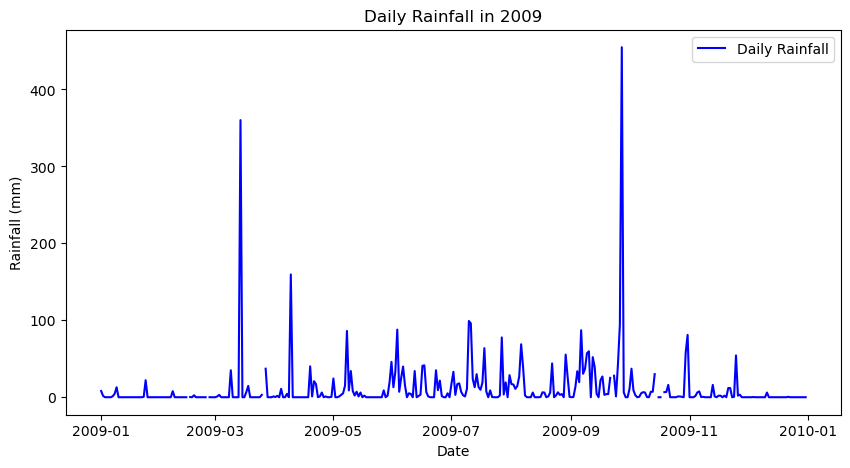

In [5]:
# Visualize the data
# Plot daily rainfall
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['DAILY RAINFALL'], color='blue', label='Daily Rainfall')
plt.title('Daily Rainfall in 2009')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

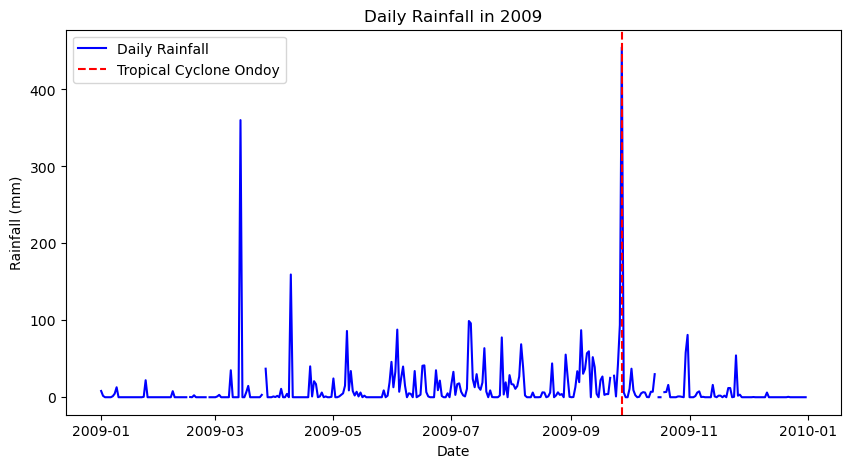

In [6]:
# Visualize the data
# Plot daily rainfall
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['DAILY RAINFALL'], color='blue', label='Daily Rainfall')
plt.axvline(pd.Timestamp('2009-09-27'), color='red', linestyle='--', label='Tropical Cyclone Ondoy')
plt.title('Daily Rainfall in 2009')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

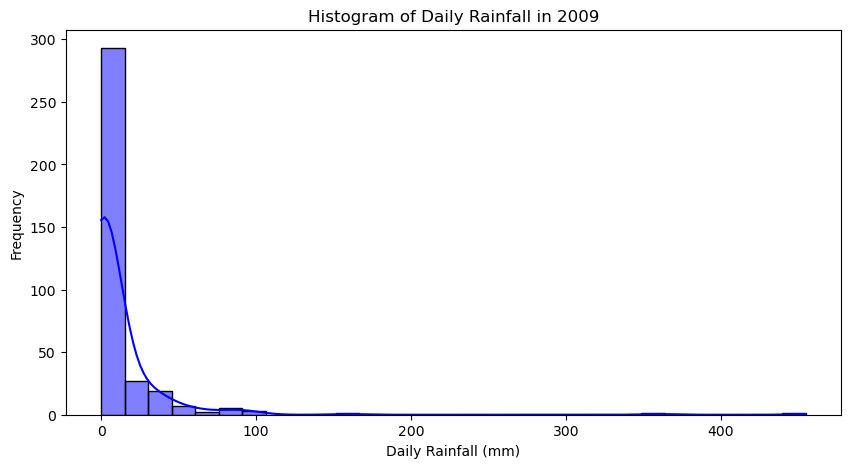

In [6]:
# 1. Histogram of Daily Rainfall
plt.figure(figsize=(10, 5))
sns.histplot(df['DAILY RAINFALL'], bins=30, kde=True, color='blue')
plt.title('Histogram of Daily Rainfall in 2009')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

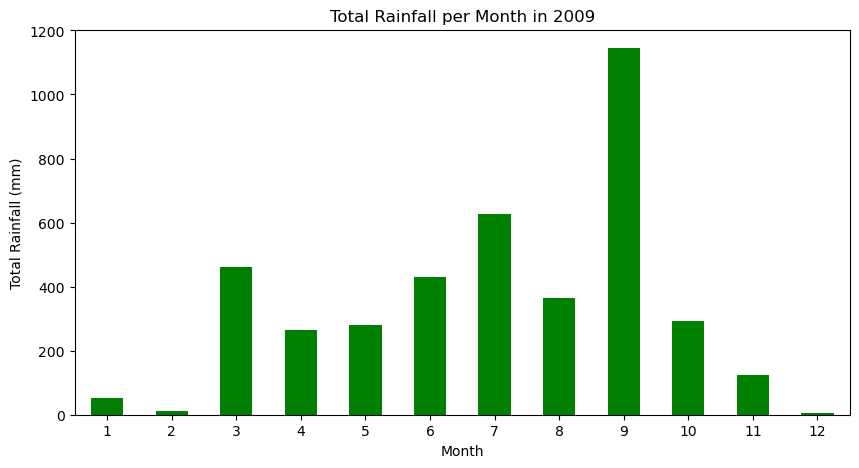

In [7]:
# 2. Column chart that accumulates rainfall per month
# Add a 'Month' column for grouping
df['Month'] = df['DATE'].dt.month
monthly_rainfall = df.groupby('Month')['DAILY RAINFALL'].sum()

plt.figure(figsize=(10, 5))
monthly_rainfall.plot(kind='bar', color='green')
plt.title('Total Rainfall per Month in 2009')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=0)
plt.show()

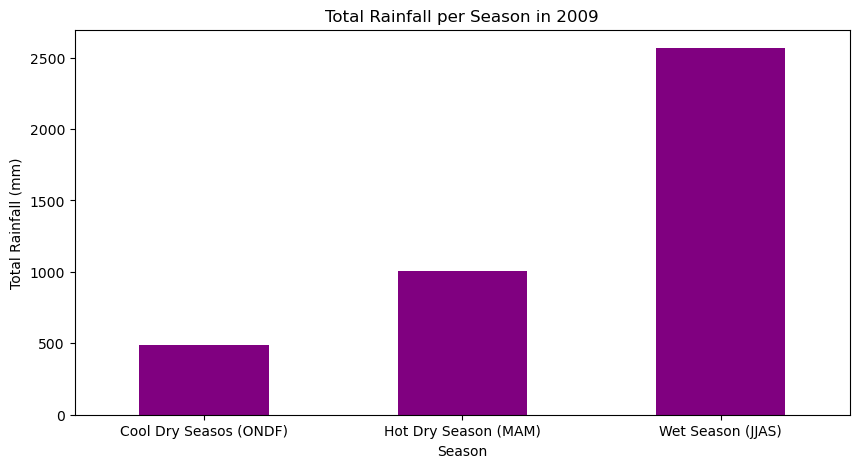

In [8]:
# 3. Column chart that accumulates rainfall per season
# Define seasons based on given criteria
def get_season(date):
    month = date.month
    if month in [6, 7, 8, 9]:
        return 'Wet Season (JJAS)'
    elif month in [10, 11, 12, 1, 2]:
        return 'Cool Dry Seasos (ONDF)'
    else:
        return 'Hot Dry Season (MAM)'

df['Season'] = df['DATE'].apply(get_season)
seasonal_rainfall = df.groupby('Season')['DAILY RAINFALL'].sum()

plt.figure(figsize=(10, 5))
seasonal_rainfall.plot(kind='bar', color='purple')
plt.title('Total Rainfall per Season in 2009')
plt.xlabel('Season')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=0)
plt.show()

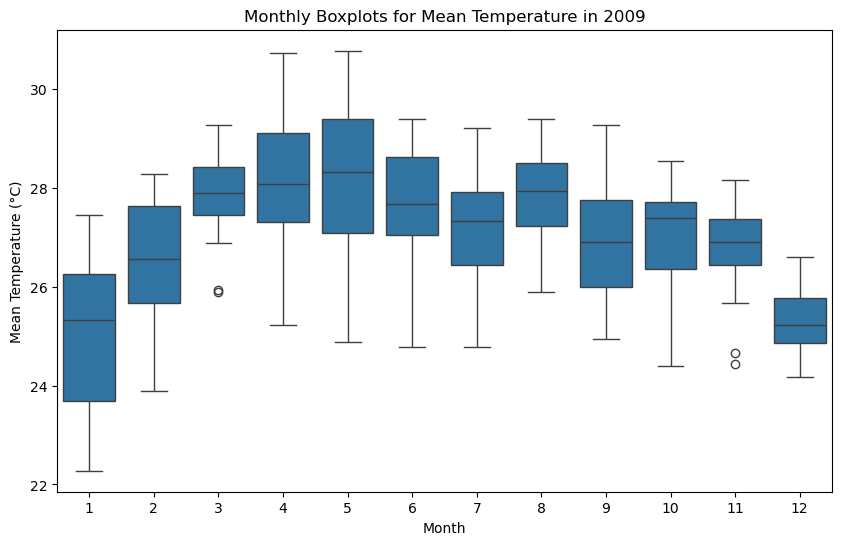

In [9]:
# Monthly boxplot for Mean Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Month'], y=df['TEMP MEAN'])
plt.title('Monthly Boxplots for Mean Temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.show()
